# Analysis of pre-processed data from Tilman's gap crossing silencing screen
* 110 lines tested; collection contains parental control and for some lines multiple effectors (Shibire, TNT) in different genetic backgrounds.
* 3 gap sizes were used (3.5, 4.0, 5.0 mm). Earlier in the screen, only gap sizes 3.5 and 5 were tested, later 3.5 and 4.

In [1]:
import scipy.io as sio
from os import mkdir
import numpy as np
from os.path import sep, isdir
from os import mkdir, makedirs, getcwd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow
from matplotlib import rcParams

import pandas as pd

from gapCrossingAnalysisFunctions import *

In [2]:
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

## Load pre-processed data (dataGC.mat)
#### Data assumed to be located in ../../Data/ folder relative to code directory, plots will be saved in ../Plots/

In [3]:
parentDir = sep.join(getcwd().split(sep)[:-2])
dataDir = parentDir+sep+'Data'
print(dataDir)

/Users/haberkernh/Desktop/GapCrossing/Data


In [4]:
plotDir = sep.join(getcwd().split(sep)[:-1]+['Plots'])
print(plotDir)
if not isdir(plotDir):
    mkdir(plotDir)

/Users/haberkernh/Desktop/GapCrossing/Analysis/Plots


In [5]:
matstruct = sio.loadmat(dataDir+sep+'dataGC.mat')
matdata = matstruct['dataGC']
matdata = matdata[:-3]
ngts = len(matdata)
print('Dataset consists of {} genotypes\n'.format(ngts))

print('For each genotype the following parameters are reported:')
print(matdata[0,][0].dtype)

Dataset consists of 110 genotypes

For each genotype the following parameters are reported:
[('genotype', 'O'), ('linename', 'O'), ('effector', 'O'), ('ax', 'O'), ('ay', 'O'), ('hx', 'O'), ('hy', 'O'), ('ang', 'O'), ('gap', 'O'), ('fly', 'O')]


In [6]:
genotypedata = matdata[0][0]
print(genotypedata[0])
print(sum(~np.isnan(genotypedata[3])))
print(sum(~np.isnan(genotypedata[8])))
print(sum(~np.isnan(genotypedata[9])))
print(set(genotypedata[8][~np.isnan(genotypedata[8])].flatten()))

['FCF_SHI']
[113]
[33]
[33]
{3.5, 5.0}


## Overview

In [7]:
driverset = []
genotypeset = []
for genotype in range(ngts):
    genotypedata = matdata[genotype][0]
    #print('{}, n={}'.format(genotypedata[1][0],len(genotypedata[5])))
    driverset.append(genotypedata[1][0])
    genotypeset.append(genotypedata[0][0])
driverset = list(set(driverset))
genotypeset = list(set(genotypeset))

print(len(driverset))
print(len(genotypeset))

75
110


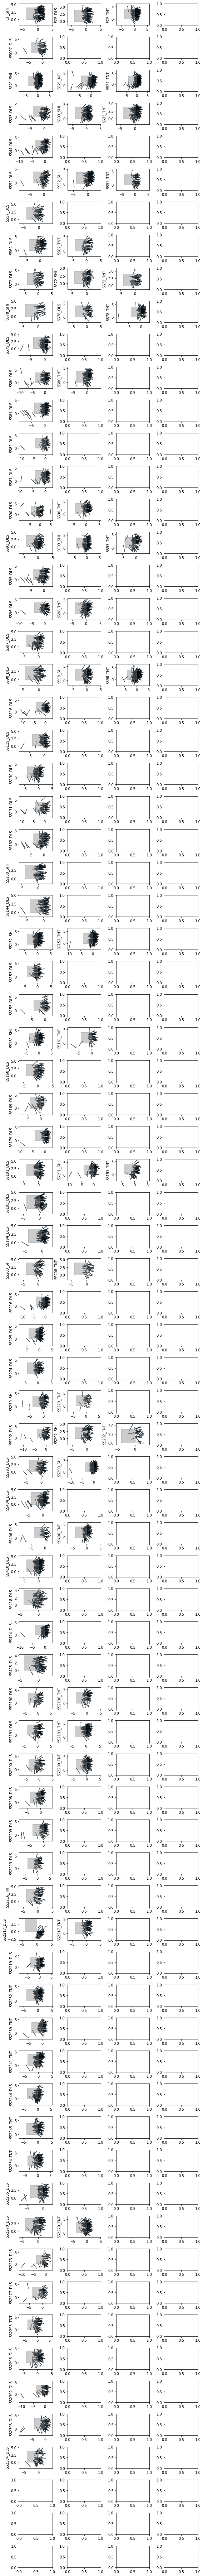

In [8]:
fig, axs = plt.subplots(len(driverset)+3,4, figsize=(8,100))

# plot each driver-genotype in one row
px = 0
py = 0
driver = matdata[0][0][1][0]

for i in range(ngts):
    genotypedata = matdata[i][0]
    
    if driver != genotypedata[1][0]:
        py+=1
        px=0
        driver = genotypedata[1][0]
        
    xa = list(np.squeeze(np.asarray(genotypedata[3])))
    xh = list(np.squeeze(np.asarray(genotypedata[4])))
    ya = list(np.squeeze(np.asarray(genotypedata[5])))
    yh = list(np.squeeze(np.asarray(genotypedata[6])))
    
    zippedx = list(zip(xa, xh))
    zippedy = list(zip(ya, yh))

    for k in range(len(zippedx)):
        arrow = FancyArrow(xa[k], ya[k], xh[k]-xa[k], yh[k]-ya[k], width=0.05, 
                      length_includes_head=True, head_width=0.25, alpha=0.6)
        axs[py, px].add_patch(arrow)
        
    rect = Rectangle((-4,0), 4, 4, color='grey', alpha=0.4)
    axs[py, px].add_patch(rect)
    
    axs[py, px].axis('equal')
    axs[py, px].set_ylabel(genotypedata[0][0])
    
    if driver == genotypedata[1][0]:
        px+=1
        
fig.tight_layout()
fig.savefig(plotDir+sep+'gapCrossing_direction_lineOverview.pdf')

#### Match lines to neuron types

In [199]:
E_PG = ['SS90','SS96','SS98','SS131']
EP_G = ['SS2254']
P_EG = ['SS2191']
G_E = ['SS95','SS97','SS130'] # all not clean
P_FN = ['SS007','SS21','SS44','SS78','SS79','SS80','SS81','SS82','SS87',
        'SS152', 'SS161','SS191','SS216','SS225','SS279','SS404','SS406',
        'SS418', 'SS424', 'SS425',
        'SS2209','SS2244', 'SS2255','SS2273','SS2277',
        'SS2302','SS2303','SS2304']
P_EN2 = ['SS2232','SS2241']
P_FR = ['SS2270','SS2293']
delta7 = ['SS116','SS119','SS193']
Ring = ['SS52','SS57','SS72','SS194','SS292','SS293']
FBintern = ['SS33','SS93']
LALPS_P = ['SS2216']
PF_LALCre = ['SS2239']
control = ['FCF']

neuronTypes = {
    'E_PG':E_PG, 
    'EP_G':EP_G,
    'P_EG':P_EG,
    'G_E':G_E,
    'P_EN2':P_EN2,
    'P_FN':P_FN,
    'delta7': delta7,
    'P_FR':P_FR,
    'Ring':Ring,
    'FBintern':FBintern,
    'LALPS_P':LALPS_P,
    'PF_LALCre':PF_LALCre,
    'control':control
}

In [200]:
nclassCols = {
    '':'silver',
    'E_PG':'m', 
    'EP_G':'plum',
    'P_EG':'hotpink',
    'G_E':'lightpink',
    'P_EN2':'mediumpurple',
    'P_FN':'tomato',
    'delta7': 'lightgreen',
    'P_FR':'deepskyblue',
    'Ring':'mediumblue',
    'FBintern':'lightseagreen',
    'LALPS_P':'yellowgreen',
    'PF_LALCre':'goldenrod',
    'control':'dimgrey'
}

#### Generate dataframe for screen data

In [201]:
offtarget_ang = 50

In [202]:
screenRawdf = pd.DataFrame()
keylist = ['genotype','ax','ay', 'hx', 'hy','angle', 'gap'] 
for i in range(ngts):
    genotypedata = matdata[i][0]
    singleFlydf = pd.DataFrame({
        'genotype': genotypedata[0][0],
        'ax': list(np.squeeze(np.asarray(genotypedata[3]))),
        'ay': list(np.squeeze(np.asarray(genotypedata[5]))),
        'hx': list(np.squeeze(np.asarray(genotypedata[4]))),
        'hy': list(np.squeeze(np.asarray(genotypedata[6]))),
        'angle': list(np.squeeze(np.asarray(genotypedata[7]))), 
        'gap': list(np.squeeze(np.asarray(genotypedata[8])))
    })
    screenRawdf = screenRawdf.append(singleFlydf)
screenRawdf = screenRawdf[keylist]

In [203]:
screenRawdf.head()

,genotype,ax,ay,hx,hy,angle,gap
0,FCF_SHI,-0.240000,3.546667,1.466667,4.933333,-10.885527,NaN
1,FCF_SHI,-0.880000,1.360000,1.733333,1.280000,10.145544,NaN
2,FCF_SHI,-0.853333,1.840000,1.573333,2.346667,15.312818,NaN
3,FCF_SHI,0.453333,0.480000,2.160000,0.266667,12.449997,NaN
4,FCF_SHI,-0.720000,0.800000,1.386667,-0.320000,5.314546,NaN


In [204]:
keylist = ['genotype','nclass','effector','fracOffTarget','numClimb', 'dist2edgeMed'] 
screenStatsdf = pd.DataFrame()
fracOffTarget = np.zeros(len(genotypeset))
numClimb = np.zeros(len(genotypeset))
dist2edge = np.zeros(len(genotypeset))
classID = []
linename = []
effector = []
for i, gt in enumerate(genotypeset):
    ax = screenRawdf.query('genotype=="{}"'.format(gt))['ax'].values
    angle = screenRawdf.query('genotype=="{}"'.format(gt))['angle'].values
    fracOffTarget[i] = 100*(sum(abs(angle)>offtarget_ang)/len(angle))
    numClimb[i] = len(angle)
    p25, p50, p75 = np.nanpercentile(ax,[25,50, 75])
    dist2edge[i] = p50
    classfound = 0
    linename.append(gt[:-4])
    effector.append(gt[-3:])
    for nclass in list(neuronTypes.keys()):
        if gt[:-4] in neuronTypes[nclass]:
            classID.append(nclass)
            classfound = 1
            break
    if not classfound:
        classID.append('')
    
screenStatsdf = pd.DataFrame({
    'genotype': linename,
    'nclass': classID,
    'effector': effector,
    'fracOffTarget': fracOffTarget,
    'numClimb': numClimb, 
    'dist2edgeMed': dist2edge
})
screenStatsdf = screenStatsdf[keylist]

In [205]:
screenStatsdf.query('genotype=="FCF"')

,genotype,nclass,effector,fracOffTarget,numClimb,dist2edgeMed
26,FCF,control,TNT,5.468750,128.0,-0.560000
94,FCF,control,DLS,4.109589,73.0,-0.613333
97,FCF,control,SHI,4.424779,113.0,-0.213333


#### For now focus on 3.5 mm gaps

In [206]:
fracOffTarget = np.zeros(len(genotypeset))
numClimb = np.zeros(len(genotypeset))
dist2edge = np.zeros(len(genotypeset))
classID = []
linename = []
effector = []
for i, gt in enumerate(genotypeset):
    ax = screenRawdf.query('(gap == 3.5) & (genotype=="{}")'.format(gt))['ax'].values
    angle = screenRawdf.query('(gap == 3.5) & (genotype=="{}")'.format(gt))['angle'].values
    if not len(ax):
        ax = np.nan
        angle = np.nan
        fracOffTarget[i] = np.nan
        numClimb[i] = np.nan
        dist2edge[i] = np.nan
    else:
        fracOffTarget[i] = 100*(sum(abs(angle)>offtarget_ang)/len(angle))
        numClimb[i] = len(angle)
        p25, p50, p75 = np.nanpercentile(ax,[25,50, 75])
        dist2edge[i] = p50
    classfound = 0
    linename.append(gt[:-4])
    effector.append(gt[-3:])
    for nclass in list(neuronTypes.keys()):
        if gt[:-4] in neuronTypes[nclass]:
            classID.append(nclass)
            classfound = 1
            break
    if not classfound:
        classID.append('')
    
screenStats35df = pd.DataFrame({
    'genotype': linename,
    'nclass': classID,
    'effector': effector,
    'fracOffTarget': fracOffTarget,
    'numClimb': numClimb, 
    'dist2edgeMed': dist2edge
})
screenStats35df = screenStats35df[keylist]

In [207]:
fracOffTarget = np.zeros(len(genotypeset))
numClimb = np.zeros(len(genotypeset))
dist2edge = np.zeros(len(genotypeset))
classID = []
linename = []
effector = []
for i, gt in enumerate(genotypeset):
    ax = screenRawdf.query('(gap == 4) & (genotype=="{}")'.format(gt))['ax'].values
    angle = screenRawdf.query('(gap == 4) & (genotype=="{}")'.format(gt))['angle'].values
    if not len(ax):
        ax = np.nan
        angle = np.nan
        fracOffTarget[i] = np.nan
        numClimb[i] = np.nan
        dist2edge[i] = np.nan
    else:
        fracOffTarget[i] = 100*(sum(abs(angle)>offtarget_ang)/len(angle))
        numClimb[i] = len(angle)
        p25, p50, p75 = np.nanpercentile(ax,[25,50, 75])
        dist2edge[i] = p50
    classfound = 0
    linename.append(gt[:-4])
    effector.append(gt[-3:])
    for nclass in list(neuronTypes.keys()):
        if gt[:-4] in neuronTypes[nclass]:
            classID.append(nclass)
            classfound = 1
            break
    if not classfound:
        classID.append('')
    
screenStats40df = pd.DataFrame({
    'genotype': linename,
    'nclass': classID,
    'effector': effector,
    'fracOffTarget': fracOffTarget,
    'numClimb': numClimb, 
    'dist2edgeMed': dist2edge
})
screenStats40df = screenStats40df[keylist]

#### Overview of climbining attempts

In [208]:
overviewdf = screenStats35df[screenStats35df.numClimb.notnull()] #screenStatsdf #screenStats40df[screenStats40df.numClimb.notnull()] #
postfix = '3-5mm' #'all'#'4-0mm'#
maxClimb = 100 #100, 150

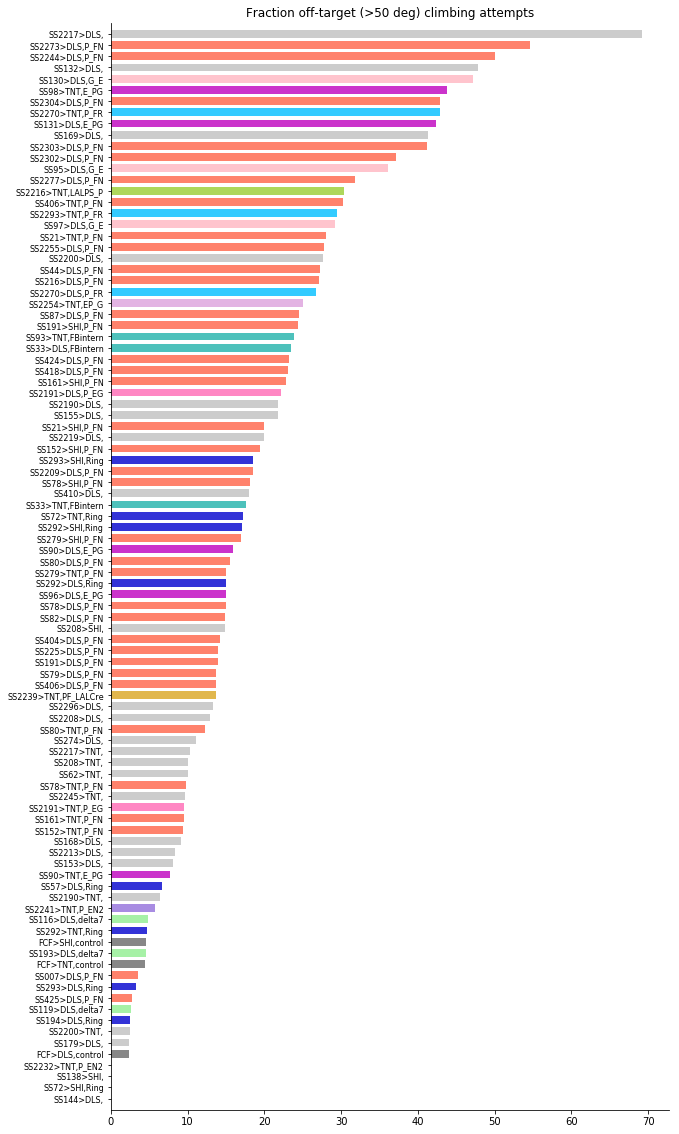

In [209]:
offTsortdf = overviewdf.sort_values(by=['fracOffTarget'])

fig, axs = plt.subplots(1,1, figsize=(10,20))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['nclass'].values[i] == '':
        barcol.append('silver')
    else:
        barcol.append(nclassCols[offTsortdf['nclass'].values[i]])

axs.barh(np.arange(len(offTsortdf)), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(len(offTsortdf)), offTsortdf['genotype']+'>'+offTsortdf['effector']+','+offTsortdf['nclass'], fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts'.format(offtarget_ang), fontsize=12);
axs.set_ylim(-1, len(offTsortdf))
myAxisTheme(axs)

fig.savefig(plotDir+sep+'screen_offtarget{}deg_lineOverview_{}.pdf'.format(offtarget_ang,postfix))

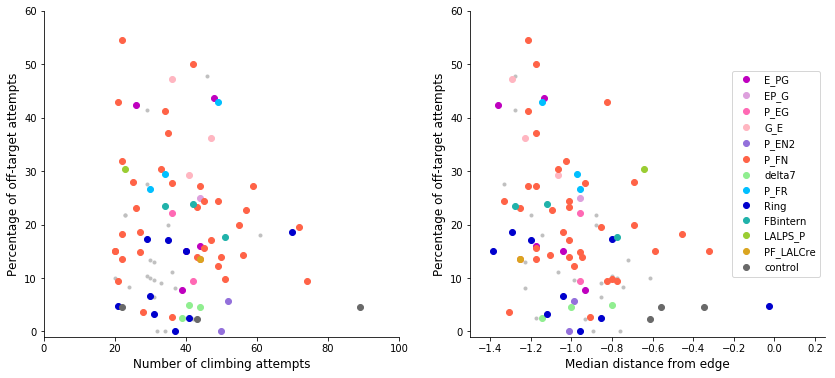

In [210]:
fig, axs = plt.subplots(1,2,figsize=(14,6))

# Climb events plot
ncdf = overviewdf.query('nclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')

for nc in neuronTypes.keys():
    ncdf = overviewdf.query('nclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)

#axs[0].legend()
axs[0].set_xlabel('Number of climbing attempts', fontsize=12)
axs[0].set_xlim(0,maxClimb)

# Distance plot
ncdf = overviewdf.query('nclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')

for nc in neuronTypes.keys():
    ncdf = overviewdf.query('nclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)
    
axs[1].legend()
axs[1].set_xlabel('Median distance from edge', fontsize=12)
axs[1].set_xlim(-1.5,0.25)

for ax in axs:
    ax.set_ylabel('Percentage of off-target attempts', fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.savefig(plotDir+sep+'screen_attemptsAndDistVSofftarget{}deg_lineOverview_{}.pdf'.format(offtarget_ang, postfix))

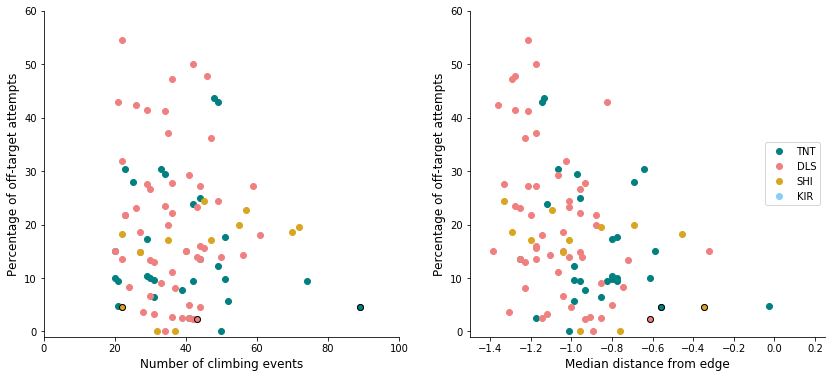

In [211]:
# Effector comparison
fig, axs = plt.subplots(1,2,figsize=(14,6))

effctorCol = ['teal','lightcoral','goldenrod','lightskyblue']
for i, ect in enumerate(['TNT','DLS','SHI','KIR']):
    ncdf = overviewdf.query('effector=="{}"'.format(ect))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=effctorCol[i], label=ect)

ncdf = overviewdf.query('nclass=="control"')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', 
         markeredgecolor='black',markerfacecolor='none',markeredgewidth=1, label='')
    
#axs[0].legend()
axs[0].set_xlabel('Number of climbing events', fontsize=12)
axs[0].set_xlim(0, maxClimb)

for i, ect in enumerate(['TNT','DLS','SHI','KIR']):
    ncdf = overviewdf.query('effector=="{}"'.format(ect))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=effctorCol[i], label=ect)

ncdf = overviewdf.query('nclass=="control"')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', 
         markeredgecolor='black',markerfacecolor='none',markeredgewidth=1, label='')
    
axs[1].legend()
axs[1].set_xlabel('Median distance from edge', fontsize=12)
axs[1].set_xlim(-1.5,0.25)

for ax in axs:
    ax.set_ylabel('Percentage of off-target attempts', fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.savefig(plotDir+sep+'screen_attemptsAndDistVSofftarget{}deg_effectorComparison_{}.pdf'.format(offtarget_ang, postfix))

### Only TNT

In [212]:
effGT = 'TNT'
TNTdf = overviewdf.query('effector=="{}"'.format(effGT))

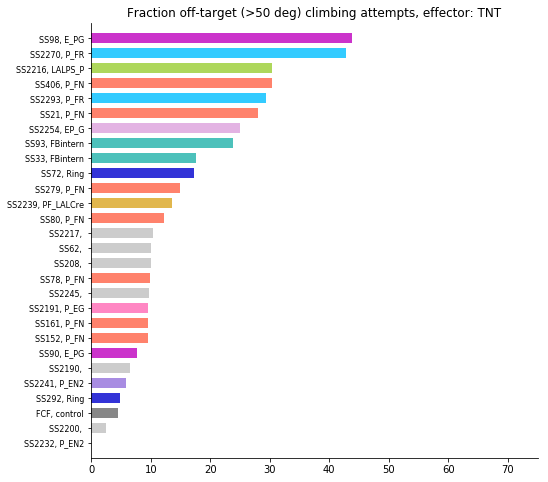

In [213]:
offTsortdf = TNTdf.sort_values(by=['fracOffTarget'])
numGT = len(TNTdf)
fig, axs = plt.subplots(1,1, figsize=(8,8))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['nclass'].values[i] == '':
        barcol.append('silver')
    else:
        barcol.append(nclassCols[offTsortdf['nclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT), offTsortdf['genotype']+', '+offTsortdf['nclass'], fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, effector: {}'.format(offtarget_ang, effGT), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
myAxisTheme(axs)

fig.savefig(plotDir+sep+'screen_offtarget{}deg_{}_{}.pdf'.format(offtarget_ang, effGT, postfix))

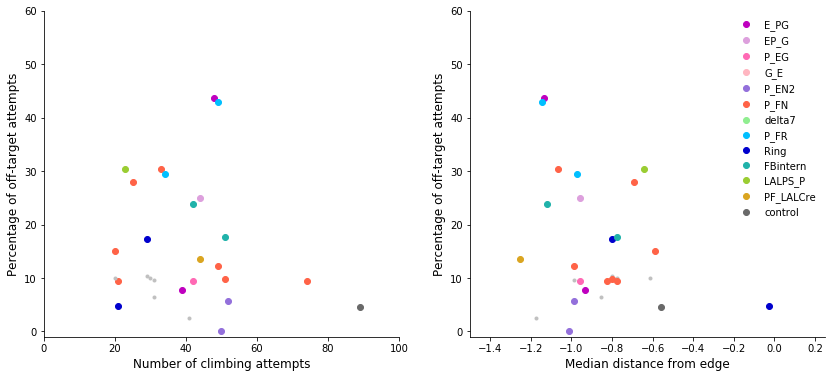

In [214]:
fig, axs = plt.subplots(1,2,figsize=(14,6))

# climb events
for nc in neuronTypes.keys():
    ncdf = TNTdf.query('nclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)
ncdf = TNTdf.query('nclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
   
axs[0].set_xlabel('Number of climbing attempts', fontsize=12)
axs[0].set_xlim(0,maxClimb)

# distance to edge
ncdf = TNTdf.query('nclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
for nc in neuronTypes.keys():
    ncdf = TNTdf.query('nclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)

leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)    
axs[1].set_xlabel('Median distance from edge', fontsize=12)
axs[1].set_xlim(-1.5,0.25)

# axis beautification
for ax in axs:
    ax.set_ylabel('Percentage of off-target attempts', fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.savefig(plotDir+sep+'screen_attemptsVSofftarget{}deg_{}_{}.pdf'.format(offtarget_ang,effGT,postfix))

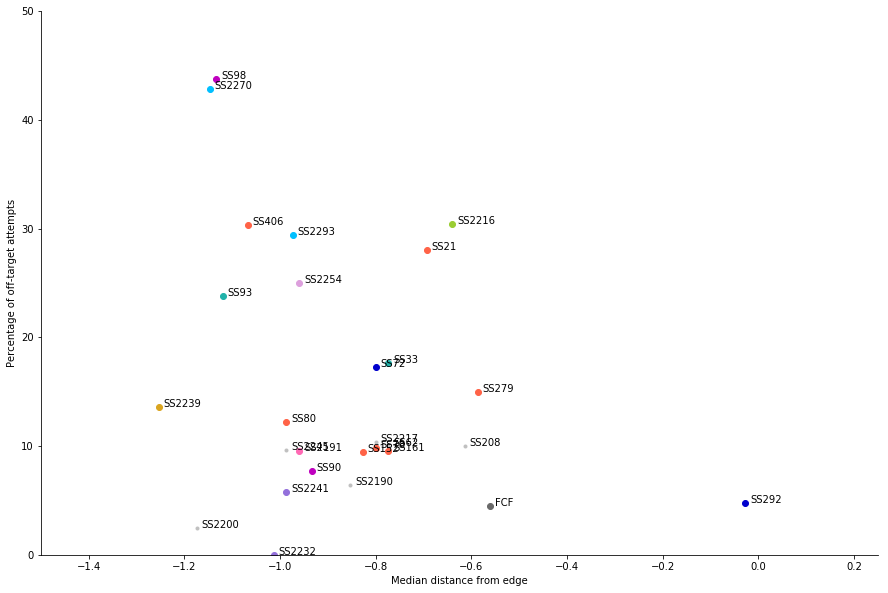

In [215]:
fig, axs = plt.subplots(1,1,figsize=(15,10))

ncdf = TNTdf.query('nclass==""')
axs.plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
for nc in neuronTypes.keys():
    ncdf = TNTdf.query('nclass=="{}"'.format(nc))
    axs.plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)

for i in range(len(TNTdf)):
    axs.text(TNTdf['dist2edgeMed'].values[i]+.01,
             TNTdf['fracOffTarget'].values[i],
             TNTdf['genotype'].values[i]) 

axs.set_xlabel('Median distance from edge')
axs.set_ylabel('Percentage of off-target attempts')
axs.set_xlim(-1.5,0.25)
axs.set_ylim(0,50)
myAxisTheme(axs)

fig.savefig(plotDir+sep+'screen_distVSofftarget{}deg_linenames_{}_{}.pdf'.format(offtarget_ang,effGT,postfix))

### Only SHI in DL background

In [216]:
effGT = 'DLS'
DLSdf = overviewdf.query('effector=="{}"'.format(effGT))

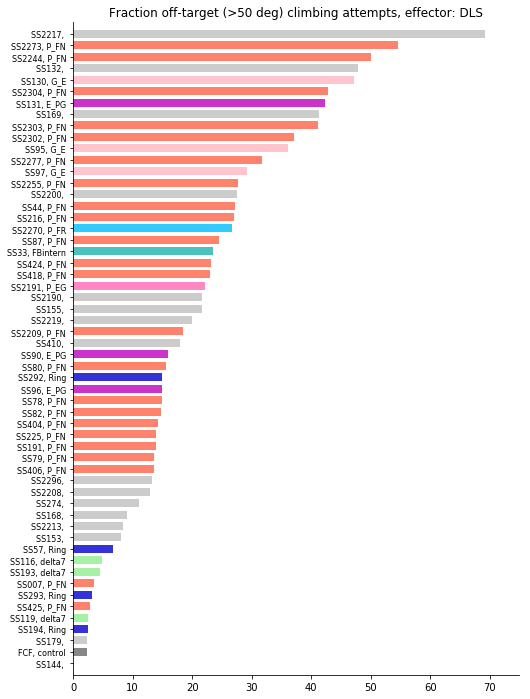

In [217]:
offTsortdf = DLSdf.sort_values(by=['fracOffTarget'])
numGT = len(DLSdf)
fig, axs = plt.subplots(1,1, figsize=(8,12))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['nclass'].values[i] == '':
        barcol.append('silver')
    else:
        barcol.append(nclassCols[offTsortdf['nclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT), offTsortdf['genotype']+', '+offTsortdf['nclass'], fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, effector: {}'.format(offtarget_ang, effGT), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
myAxisTheme(axs)

fig.savefig(plotDir+sep+'screen_offtarget{}deg_{}_{}.pdf'.format(offtarget_ang, effGT,postfix))

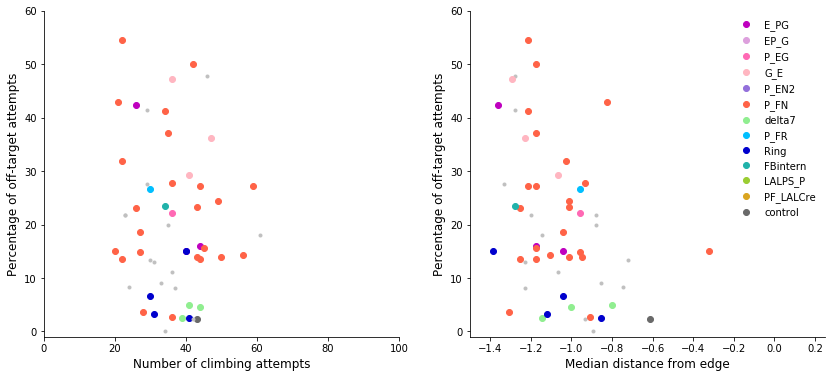

In [218]:
fig, axs = plt.subplots(1,2,figsize=(14,6))

# climb events
for nc in neuronTypes.keys():
    ncdf = DLSdf.query('nclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)
ncdf = DLSdf.query('nclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
   
axs[0].set_xlabel('Number of climbing attempts', fontsize=12)
axs[0].set_xlim(0,maxClimb)

# distance to edge
ncdf = DLSdf.query('nclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
for nc in neuronTypes.keys():
    ncdf = DLSdf.query('nclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)

leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)    
axs[1].set_xlabel('Median distance from edge', fontsize=12)
axs[1].set_xlim(-1.5,0.25)

# axis beautification
for ax in axs:
    ax.set_ylabel('Percentage of off-target attempts', fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.savefig(plotDir+sep+'screen_attemptsVSofftarget{}deg_{}_{}.pdf'.format(offtarget_ang,effGT,postfix))

### Only SHI

In [219]:
effGT = 'SHI'
SHIdf = overviewdf.query('effector=="{}"'.format(effGT))

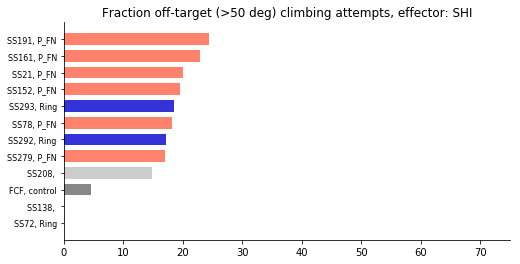

In [220]:
offTsortdf = SHIdf.sort_values(by=['fracOffTarget'])
numGT = len(SHIdf)
fig, axs = plt.subplots(1,1, figsize=(8,4))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['nclass'].values[i] == '':
        barcol.append('silver')
    else:
        barcol.append(nclassCols[offTsortdf['nclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT), offTsortdf['genotype']+', '+offTsortdf['nclass'], fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, effector: {}'.format(offtarget_ang, effGT), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
myAxisTheme(axs)


fig.savefig(plotDir+sep+'screen_offtarget{}deg_{}_{}.pdf'.format(offtarget_ang, effGT, postfix))

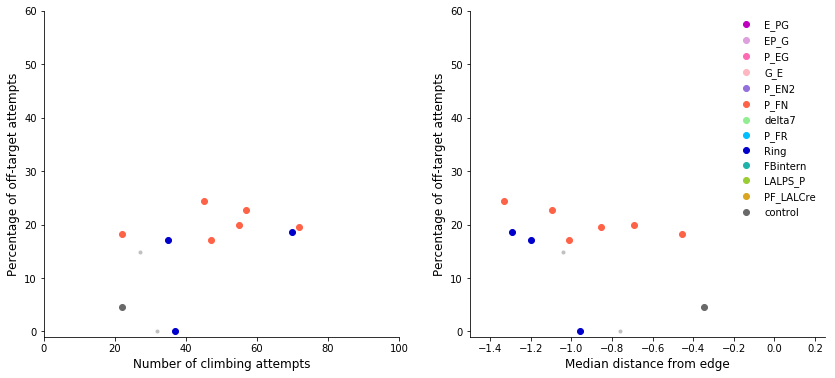

In [221]:
fig, axs = plt.subplots(1,2,figsize=(14,6))

# climb events
for nc in neuronTypes.keys():
    ncdf = SHIdf.query('nclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)
ncdf = SHIdf.query('nclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
   
axs[0].set_xlabel('Number of climbing attempts', fontsize=12)
axs[0].set_xlim(0,maxClimb)

# distance to edge
ncdf = SHIdf.query('nclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
for nc in neuronTypes.keys():
    ncdf = SHIdf.query('nclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=nclassCols[nc], label=nc)

leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)    
axs[1].set_xlabel('Median distance from edge', fontsize=12)
axs[1].set_xlim(-1.5,0.25)

# axis beautification
for ax in axs:
    ax.set_ylabel('Percentage of off-target attempts', fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.savefig(plotDir+sep+'screen_attemptsVSofftarget{}deg_{}_{}.pdf'.format(offtarget_ang,effGT,postfix))

### Compare across effectors

In [222]:
TNTdf = overviewdf.query('effector=="TNT"')
DLSdf = overviewdf.query('effector=="DLS"')
SHIdf = overviewdf.query('effector=="SHI"')

#print(len(TNTdriver))
#print(len(DLSdriver))
#print(len(SHIdriver))

TNTdriver = set(TNTdf['genotype'].values)
DLSdriver = set(DLSdf['genotype'].values)
SHIdriver = set(SHIdf['genotype'].values)

shareddriver_TNT_DLS = TNTdriver.intersection(DLSdriver)
shareddriver_TNT_SHI = TNTdriver.intersection(SHIdriver)
shareddriver_DLS_SHI = DLSdriver.intersection(SHIdriver)
shareddriver_all = shareddriver_TNT_DLS.intersection(SHIdriver)

In [223]:
print(len(shareddriver_TNT_DLS))
print(len(shareddriver_TNT_SHI))
print(len(shareddriver_DLS_SHI))
print(len(shareddriver_all))

12
9
5
3


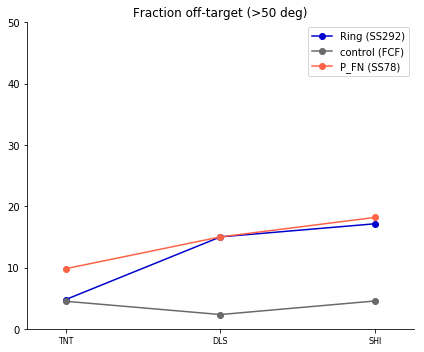

In [224]:
fig, axs = plt.subplots(1,1, figsize=(6,5))

effs = ['TNT','DLS','SHI']

for i, gt in enumerate(list(shareddriver_all)):
    gtdf = overviewdf.query('genotype=="{}"'.format(gt))
    
    vals = [gtdf.query('effector == "{}"'.format(ef))['fracOffTarget'].values for ef in effs]
    
    axs.plot(np.arange(len(effs)),vals, 'o-',
             color=nclassCols[gtdf['nclass'].values[0]],
            label=gtdf['nclass'].values[0]+' ('+gt+')')
    
plt.xticks(np.arange(len(effs)), effs, fontsize=8)
axs.legend()
axs.set_title('Fraction off-target (>{} deg)'.format(offtarget_ang), fontsize=12);
axs.set_ylim(0, 50)
axs.set_xlim(-0.25, len(effs)-.75)
myAxisTheme(axs)
fig.tight_layout()

fig.savefig(plotDir+sep+'effectorComparison_all_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

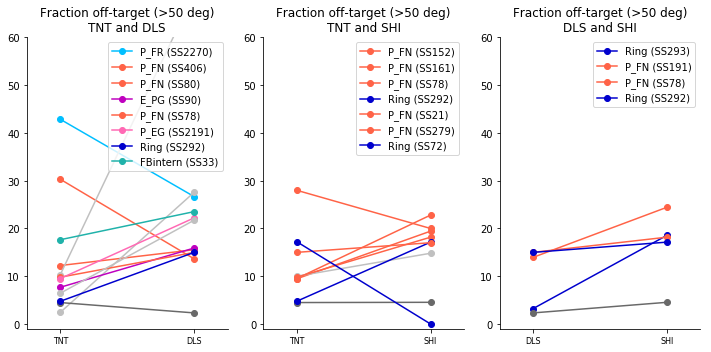

In [225]:
fig, axs = plt.subplots(1,3, figsize=(10,5))


effectorpairs = (['TNT','DLS'],['TNT','SHI'],['DLS','SHI'])
effpairdfs = [shareddriver_TNT_DLS ,shareddriver_TNT_SHI,shareddriver_DLS_SHI]

for k, effs in enumerate(effectorpairs):
    for i, gt in enumerate(list(effpairdfs[k])):
        gtdf = overviewdf.query('genotype=="{}"'.format(gt))
        vals = [gtdf.query('effector == "{}"'.format(ef))['fracOffTarget'].values for ef in effs]
        if gtdf['nclass'].values[0] == 'control':
            axs[k].plot(np.arange(len(effs)),vals, 'o-',color='dimgrey')#,label=gtdf['nclass'].values[0]+' ('+gt+')')
        elif len(gtdf['nclass'].values[0]) == 0:
            axs[k].plot(np.arange(len(effs)),vals, 'o-',color='silver')
        else:
            axs[k].plot(np.arange(len(effs)),vals, 'o-',color=nclassCols[gtdf['nclass'].values[0]],
                        label=gtdf['nclass'].values[0]+' ('+gt+')')
    plt.sca(axs[k])
    plt.xticks(np.arange(len(effs)), effs, fontsize=8)
    axs[k].set_title('Fraction off-target (>{} deg)\n{} and {}'.format(offtarget_ang, effs[0],effs[1]), fontsize=12);

for ax in axs:
    ax.legend()
    ax.set_ylim(-1, 60)
    ax.set_xlim(-0.25, len(effs)-.75)
    myAxisTheme(ax)
fig.tight_layout()

fig.savefig(plotDir+sep+'effectorComparison_pairs_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

### P-FN comparison

In [226]:
# Finer classification of P-FNs:
P_FN1 = []
P_FN2 = []
P_FN3 = ['SS007','SS80', 'SS81','SS406','SS2255']
P_FN4 = ['SS78','SS161']
P_FN5 = ['SS2209']

P_FN1__P_FN2 = ['SS44','SS191','SS279','SS425']
P_FN3__P_FN4 = ['SS404']
P_FN4__P_FN5 = ['SS82']

P_FN1__P_FN2__P_FN3 = ['SS418','SS2303','SS2304']
P_FN1__P_FN2__P_FN4 = ['SS216']
P_FN3__P_FN4__P_FN5 = ['SS87']

P_FN1__P_FN2__P_FN3__P_FN4 = ['SS2302']


P_FN1__P_FN2__P_FN3__P_FN4__SPS_P = ['SS21']
P_FN4__P_FN5__plus = ['SS152']

PFNtypes = {
    'P_FN1':P_FN1,
    'P_FN2':P_FN2,
    'P_FN3':P_FN3,
    'P_FN4':P_FN4,
    'P_FN5':P_FN5,
    
    'P_FN1_2':P_FN1__P_FN2,
    'P_FN3_4':P_FN3__P_FN4,
    'P_FN4_5':P_FN4__P_FN5,
    
    'P_FN1_2_3':P_FN1__P_FN2__P_FN3,
    'P_FN1_2_4':P_FN1__P_FN2__P_FN4,
    'P_FN3_4_5':P_FN3__P_FN4__P_FN5,
    
    'P_FN1_2_3_4':P_FN1__P_FN2__P_FN3__P_FN4
    
}
#,
#    'P_FN1_2_3_4__SPS_P': P_FN1__P_FN2__P_FN3__P_FN4__SPS_P,
#    'P_FN4_5__plus': P_FN4__P_FN5__plus
#}
P_FN_cols = {
    'P_FN1':'red', 
    'P_FN2':'tomato', 
    'P_FN3':'mediumseagreen', 
    'P_FN4':'deepskyblue', 
    'P_FN5':'steelblue', 
    'P_FN1_2':'firebrick',
    'P_FN3_4': 'turquoise',
    'P_FN4_5': 'mediumblue',
    'P_FN1_2_3':'darkgoldenrod',
    'P_FN1_2_4':'palevioletred',
    'P_FN3_4_5':'teal',
    'P_FN1_2_3_4':'darkolivegreen'
}

In [227]:
nclass = 'P_FN'
P_FNdf = overviewdf.query('nclass=="P_FN" or nclass=="control"')

In [228]:
keylist = ['genotype','nclass','PFNclass','effector','fracOffTarget','numClimb', 'dist2edgeMed'] 
PFNtype = []
for i, gt in enumerate(P_FNdf['genotype'].values):
    typefound = 0
    for pfn in list(PFNtypes.keys()):
        if gt in PFNtypes[pfn]:
            PFNtype.append(pfn)
            typefound = 1
            break
    if not typefound:
        if gt == 'FCF':
            PFNtype.append('control')
        else:
            PFNtype.append('')
    
P_FNdf['PFNclass'] = PFNtype
P_FNdf = P_FNdf[keylist]

/Users/haberkernh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [229]:
P_FNdf.head()

,genotype,nclass,PFNclass,effector,fracOffTarget,numClimb,dist2edgeMed
3,SS87,P_FN,P_FN3_4_5,DLS,24.489796,49.0,-1.013333
4,SS78,P_FN,P_FN4,SHI,18.181818,22.0,-0.453333
5,SS191,P_FN,P_FN1_2,SHI,24.444444,45.0,-1.333333
10,SS78,P_FN,P_FN4,DLS,15.000000,20.0,-0.320000
13,SS80,P_FN,P_FN3,DLS,15.555556,45.0,-1.173333


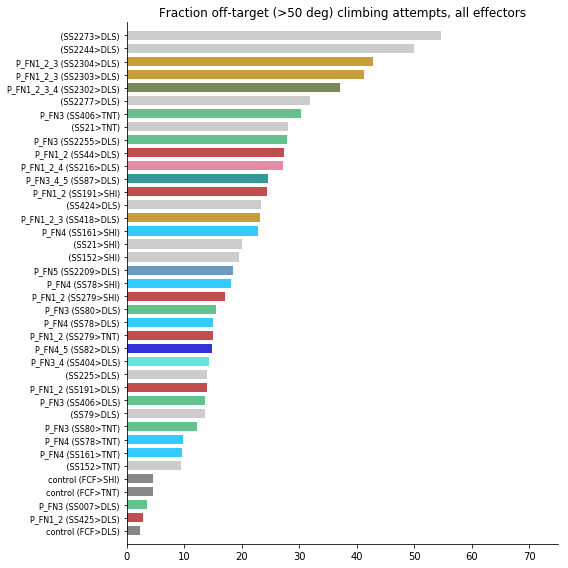

In [230]:
offTsortdf = P_FNdf.sort_values(by=['fracOffTarget'])
numGT = len(P_FNdf)

fig, axs = plt.subplots(1,1, figsize=(8,8))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['PFNclass'].values[i] == '':
        barcol.append('silver')
    elif offTsortdf['PFNclass'].values[i] == 'control':
        barcol.append('dimgrey')
    else:
        barcol.append(P_FN_cols[offTsortdf['PFNclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT),offTsortdf['PFNclass']+' ('+offTsortdf['genotype']+'>'+offTsortdf['effector']+')', fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, all effectors'.format(offtarget_ang), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
myAxisTheme(axs)
fig.tight_layout()

fig.savefig(plotDir+sep+'PFNcomparison_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

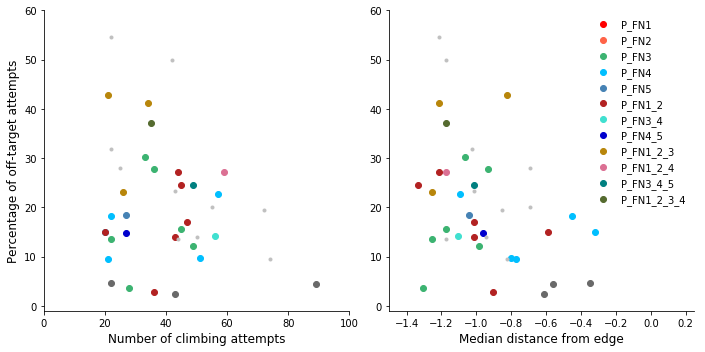

In [231]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

for nc in PFNtypes.keys():
    ncdf = P_FNdf.query('PFNclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=P_FN_cols[nc], label=nc)

ncdf = P_FNdf.query('PFNclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = P_FNdf.query('PFNclass=="control"')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
axs[0].set_xlabel('Number of climbing attempts',fontsize=12)
axs[0].set_xlim(0,100)

for nc in PFNtypes.keys():
    ncdf = P_FNdf.query('PFNclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=P_FN_cols[nc], label=nc)

ncdf = P_FNdf.query('PFNclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = P_FNdf.query('PFNclass=="control"')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
    
leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)
axs[1].set_xlabel('Median distance from edge',fontsize=12)
axs[1].set_xlim(-1.5,0.25)

for ax in axs:
    axs[0].set_ylabel('Percentage of off-target attempts',fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.tight_layout()
fig.savefig(plotDir+sep+'PFNcomparison_attemptsVSofftargetVSdist{}deg_{}.pdf'.format(offtarget_ang, postfix))

#### Compare P-FN effects across effectors

In [232]:
TNTdf = P_FNdf.query('effector=="TNT"')
DLSdf = P_FNdf.query('effector=="DLS"')
SHIdf = P_FNdf.query('effector=="SHI"')

#print(len(TNTdriver))
#print(len(DLSdriver))
#print(len(SHIdriver))

TNTdriver = set(TNTdf['genotype'].values)
DLSdriver = set(DLSdf['genotype'].values)
SHIdriver = set(SHIdf['genotype'].values)

shareddriver_TNT_DLS = TNTdriver.intersection(DLSdriver)
shareddriver_TNT_SHI = TNTdriver.intersection(SHIdriver)
shareddriver_DLS_SHI = DLSdriver.intersection(SHIdriver)
shareddriver_all = shareddriver_TNT_DLS.intersection(SHIdriver)

print(len(shareddriver_TNT_DLS))
print(len(shareddriver_TNT_SHI))
print(len(shareddriver_DLS_SHI))
print(len(shareddriver_all))

4
6
3
2


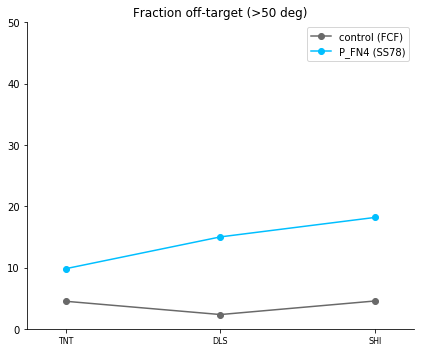

In [233]:
fig, axs = plt.subplots(1,1, figsize=(6,5))

effs = ['TNT','DLS','SHI']

for i, gt in enumerate(list(shareddriver_all)):
    gtdf = P_FNdf.query('genotype=="{}"'.format(gt))
    
    vals = [gtdf.query('effector == "{}"'.format(ef))['fracOffTarget'].values for ef in effs]
    if gtdf['PFNclass'].values[0] == 'control':
        axs.plot(np.arange(len(effs)),vals, 'o-',color='dimgrey',
                 label=gtdf['PFNclass'].values[0]+' ('+gt+')')
    elif len(gtdf['PFNclass'].values[0]) == 0:
        axs.plot(np.arange(len(effs)),vals, 'o-',color='silver',
                label=gtdf['PFNclass'].values[0]+' ('+gt+')')
    else:
        axs.plot(np.arange(len(effs)),vals, 'o-',
             color=P_FN_cols[gtdf['PFNclass'].values[0]],
            label=gtdf['PFNclass'].values[0]+' ('+gt+')')
        
    
plt.xticks(np.arange(len(effs)), effs, fontsize=8)
axs.legend()
axs.set_title('Fraction off-target (>{} deg)'.format(offtarget_ang), fontsize=12);
axs.set_ylim(0, 50)
axs.set_xlim(-0.25, len(effs)-.75)
myAxisTheme(axs)
fig.tight_layout()

fig.savefig(plotDir+sep+'PFNeffectorComparison_all_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

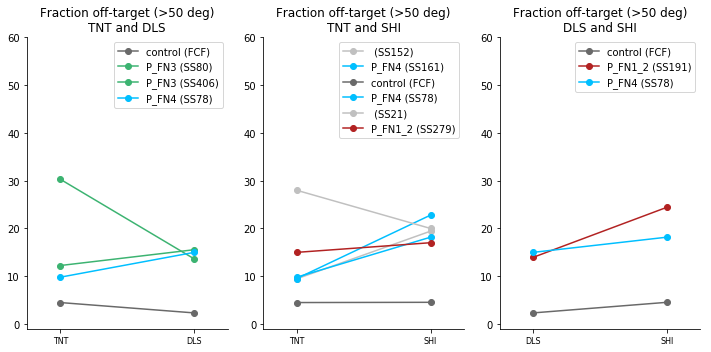

In [234]:
fig, axs = plt.subplots(1,3, figsize=(10,5))

effectorpairs = (['TNT','DLS'],['TNT','SHI'],['DLS','SHI'])
effpairdfs = [shareddriver_TNT_DLS ,shareddriver_TNT_SHI,shareddriver_DLS_SHI]

for k, effs in enumerate(effectorpairs):
    for i, gt in enumerate(list(effpairdfs[k])):
        gtdf = P_FNdf.query('genotype=="{}"'.format(gt))
        vals = [gtdf.query('effector == "{}"'.format(ef))['fracOffTarget'].values for ef in effs]
        if gtdf['PFNclass'].values[0] == 'control':
            axs[k].plot(np.arange(len(effs)),vals, 'o-',color='dimgrey',
                        label=gtdf['PFNclass'].values[0]+' ('+gt+')')
        elif len(gtdf['PFNclass'].values[0]) == 0:
            axs[k].plot(np.arange(len(effs)),vals, 'o-',color='silver',
                        label=gtdf['PFNclass'].values[0]+' ('+gt+')')
        else:
            axs[k].plot(np.arange(len(effs)),vals, 'o-',
                        color=P_FN_cols[gtdf['PFNclass'].values[0]],
                        label=gtdf['PFNclass'].values[0]+' ('+gt+')')
    plt.sca(axs[k])
    plt.xticks(np.arange(len(effs)), effs, fontsize=8)
    axs[k].set_title('Fraction off-target (>{} deg)\n{} and {}'.format(offtarget_ang, effs[0],effs[1]), fontsize=12);

for ax in axs:
    ax.legend()
    ax.set_ylim(-1, 60)
    ax.set_xlim(-0.25, len(effs)-.75)
    myAxisTheme(ax)
fig.tight_layout()

fig.savefig(plotDir+sep+'PFNeffectorComparison_pairs_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

#### Specific effector

In [235]:
effGT = 'DLS'
effPFNdf = P_FNdf.query('effector=="{}"'.format(effGT))

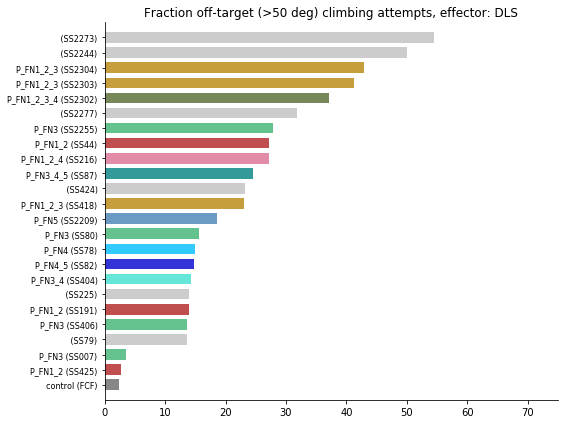

In [236]:
offTsortdf = effPFNdf.sort_values(by=['fracOffTarget'])
numGT = len(offTsortdf)

fig, axs = plt.subplots(1,1, figsize=(8,6)) #3.5, 4, 6

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['PFNclass'].values[i] == '':
        barcol.append('silver')
    elif offTsortdf['PFNclass'].values[i] == 'control':
        barcol.append('dimgrey')
    else:
        barcol.append(P_FN_cols[offTsortdf['PFNclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT),offTsortdf['PFNclass']+' ('+offTsortdf['genotype']+')', fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, effector: {}'.format(offtarget_ang, effGT), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
fig.tight_layout()
myAxisTheme(axs)

fig.savefig(plotDir+sep+'PFNcomparison_offtarget{}deg_{}_{}.pdf'.format(offtarget_ang,effGT,postfix))

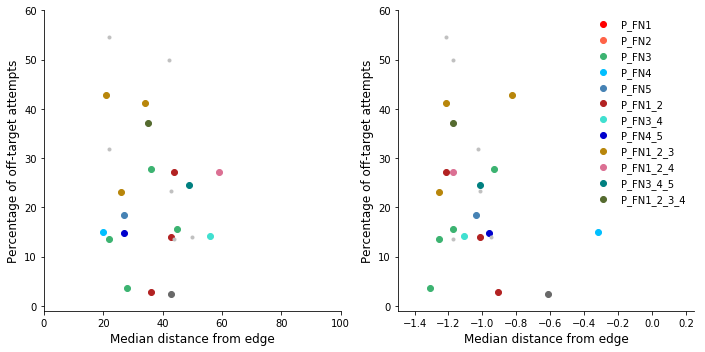

In [237]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

for nc in PFNtypes.keys():
    ncdf = effPFNdf.query('PFNclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=P_FN_cols[nc], label=nc)

ncdf = effPFNdf.query('PFNclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = effPFNdf.query('PFNclass=="control"')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
axs[0].set_ylabel('Percentage of off-target attempts',fontsize=12)
axs[0].set_xlim(0,100)

for nc in PFNtypes.keys():
    ncdf = effPFNdf.query('PFNclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=P_FN_cols[nc], label=nc)

ncdf = effPFNdf.query('PFNclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = effPFNdf.query('PFNclass=="control"')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)
axs[1].set_ylabel('Percentage of off-target attempts',fontsize=12)
axs[1].set_xlim(-1.5,0.25)

for ax in axs:
    ax.set_xlabel('Median distance from edge',fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)
    
fig.tight_layout()

fig.savefig(plotDir+sep+'PFNcomparison_attemptsVSofftargetVSdist{}deg_{}_{}.pdf'.format(offtarget_ang, effGT,postfix))

### Ring neuron comparison

In [238]:
nclass = 'Ring'
Ringdf = overviewdf.query('nclass=="Ring" or nclass=="control"')
Ringdf.head()

,genotype,nclass,effector,fracOffTarget,numClimb,dist2edgeMed
9,SS293,Ring,SHI,18.571429,70.0,-1.293333
18,SS292,Ring,TNT,4.761905,21.0,-0.026667
26,FCF,control,TNT,4.494382,89.0,-0.560000
37,SS292,Ring,DLS,15.000000,40.0,-1.386667
41,SS194,Ring,DLS,2.439024,41.0,-0.853333


In [243]:
Gal_LALtop_EB = ['SS52','SS72','SS292']
Gal_LAL_EB = ['SS57']
BU_EB_R2R4 = ['SS194']
BU_EB_R3 = ['SS293']

Ringtypes = {
    'Gal_LALtop_EB': Gal_LALtop_EB,
    'Gal_LAL_EB': Gal_LAL_EB,
    'BU_EB_R2R4': BU_EB_R2R4,
    'BU_EB_R3': BU_EB_R3
}

In [244]:
Ring_cols = {
    'BU_EB_R1':'red', 
    'BU_EB_R3':'tomato', 
    'BU_EB_R2':'mediumseagreen', 
    'BU_EB_R4':'deepskyblue', 
    'BU_EB_R2R4':'steelblue', 
    'BU_EB_R1R3':'firebrick',
    'Gal_LAL_EB': 'purple',
    'Gal_LALtop_EB':'darkgoldenrod',
}

In [245]:
keylist = ['genotype','nclass','Ringclass','effector','fracOffTarget','numClimb', 'dist2edgeMed'] 
Ringtype = []
for i, gt in enumerate(Ringdf['genotype'].values):
    typefound = 0
    for rn in list(Ringtypes.keys()):
        if gt in Ringtypes[rn]:
            Ringtype.append(rn)
            typefound = 1
            break
    if not typefound:
        if gt == 'FCF':
            Ringtype.append('control')
        else:
            Ringtype.append('')
    
Ringdf['Ringclass'] = Ringtype
Ringdf = Ringdf[keylist]
Ringdf

,genotype,nclass,Ringclass,effector,fracOffTarget,numClimb,dist2edgeMed
9,SS293,Ring,BU_EB_R3,SHI,18.571429,70.0,-1.293333
18,SS292,Ring,Gal_LALtop_EB,TNT,4.761905,21.0,-0.026667
26,FCF,control,control,TNT,4.494382,89.0,-0.560000
37,SS292,Ring,Gal_LALtop_EB,DLS,15.000000,40.0,-1.386667
41,SS194,Ring,BU_EB_R2R4,DLS,2.439024,41.0,-0.853333
54,SS57,Ring,Gal_LAL_EB,DLS,6.666667,30.0,-1.040000
61,SS293,Ring,BU_EB_R3,DLS,3.225806,31.0,-1.120000
75,SS72,Ring,Gal_LALtop_EB,SHI,0.000000,37.0,-0.960000
94,FCF,control,control,DLS,2.325581,43.0,-0.613333
97,FCF,control,control,SHI,4.545455,22.0,-0.346667


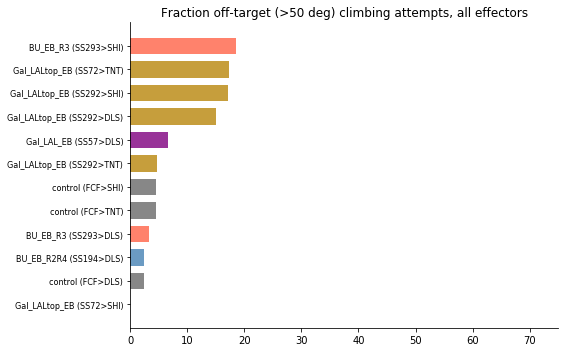

In [246]:
offTsortdf = Ringdf.sort_values(by=['fracOffTarget'])
numGT = len(Ringdf)

fig, axs = plt.subplots(1,1, figsize=(8,5))

barcol = []
for i in range(len(offTsortdf)):
    if offTsortdf['Ringclass'].values[i] == '':
        barcol.append('silver')
    elif offTsortdf['Ringclass'].values[i] == 'control':
        barcol.append('dimgrey')
    else:
        barcol.append(Ring_cols[offTsortdf['Ringclass'].values[i]])

axs.barh(np.arange(numGT), offTsortdf['fracOffTarget'], 0.7, alpha=0.8, color=barcol)
plt.yticks(np.arange(numGT),offTsortdf['Ringclass']+' ('+offTsortdf['genotype']+'>'+offTsortdf['effector']+')', fontsize=8)
axs.set_title('Fraction off-target (>{} deg) climbing attempts, all effectors'.format(offtarget_ang), fontsize=12);
axs.set_xlim(0, 75)
axs.set_ylim(-1, numGT)
myAxisTheme(axs)
fig.tight_layout()

fig.savefig(plotDir+sep+'RingNcomparison_offtarget{}deg_{}.pdf'.format(offtarget_ang,postfix))

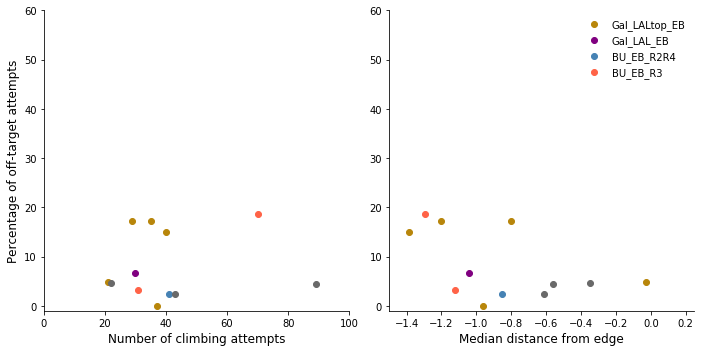

In [252]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

for nc in Ringtypes.keys():
    ncdf = Ringdf.query('Ringclass=="{}"'.format(nc))
    axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color=Ring_cols[nc], label=nc)

ncdf = Ringdf.query('Ringclass==""')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = Ringdf.query('Ringclass=="control"')
axs[0].plot(ncdf['numClimb'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
axs[0].set_xlabel('Number of climbing attempts',fontsize=12)
axs[0].set_xlim(0,100)

for nc in Ringtypes.keys():
    ncdf = Ringdf.query('Ringclass=="{}"'.format(nc))
    axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color=Ring_cols[nc], label=nc)

ncdf = Ringdf.query('Ringclass==""')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'.', color='silver',label='')
ncdf = Ringdf.query('Ringclass=="control"')
axs[1].plot(ncdf['dist2edgeMed'],ncdf['fracOffTarget'],'o', color='dimgrey',label='')
    
leg = axs[1].legend(loc='upper right', frameon='False')
leg.get_frame().set_linewidth(0.0)
axs[1].set_xlabel('Median distance from edge',fontsize=12)
axs[1].set_xlim(-1.5,0.25)

for ax in axs:
    axs[0].set_ylabel('Percentage of off-target attempts',fontsize=12)
    ax.set_ylim(-1,60)
    myAxisTheme(ax)

fig.tight_layout()
fig.savefig(plotDir+sep+'RingNcomparison_attemptsVSofftargetVSdist{}deg_{}.pdf'.format(offtarget_ang, postfix))